# Classification d’images bruitées de chiffres (MNIST)


Gloria Benoit - M2BI

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras

## Récupération des données

### Chargement des données

In [ ]:
train_images = np.load("../data/train_images.npy")
train_labels = np.load("../data/train_labels.npy")
test_images = np.load("../data/test_images.npy")
test_labels = np.load("../data/test_labels.npy")

In [ ]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

print(np.unique(train_labels))
print(np.unique(test_labels))

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)
[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


### Visualisation des données

On a des images représentant des chiffres.

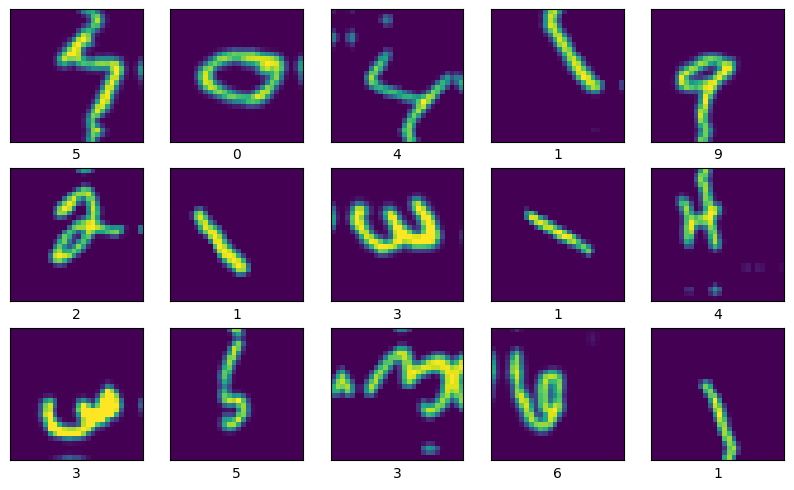

In [ ]:
plt.figure(figsize=[10, 10])
for i in range (15):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  plt.xlabel(train_labels[i])

plt.show()

### Répartition des classes

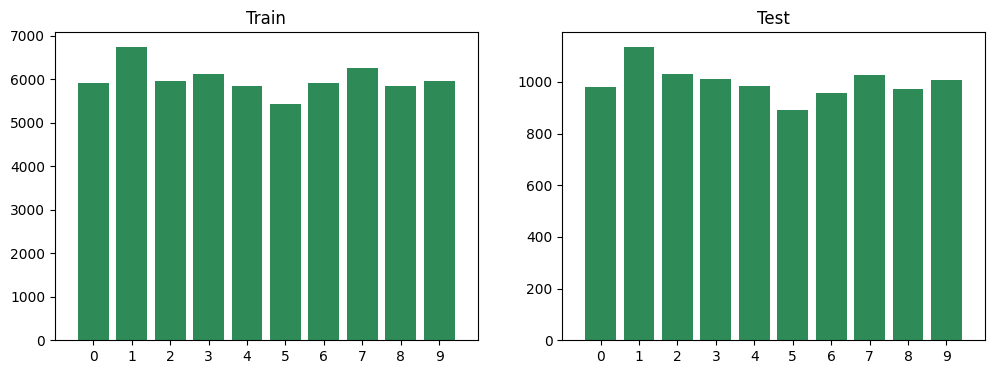

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

data = list(train_labels)
counts = np.bincount(data)

ax[0].bar(range(10), counts, width=0.8, align='center', color='seagreen')
ax[0].set(xticks=range(10), xlim=[-1, 10])
ax[0].set_title("Train")

data = list(test_labels)
counts = np.bincount(data)

ax[1].bar(range(10), counts, width=0.8, align='center', color='seagreen')
ax[1].set(xticks=range(10), xlim=[-1, 10])
ax[1].set_title("Test")

plt.show()

On a une répartition des classes assez homogènes, et équivalentes entre l'échantillon de train et celui de test. On a aussi beaucoup de valeurs en train et en test. Donc notre jeu de données est de qualité.

### Formattage des données

In [ ]:
print("Train:")
print(train_images.dtype)
print(train_images[0][5][15:20])
print("Test:")
print(test_images.dtype)
print(test_images[0][5][15:20])

Train:
float32
[[0.90452844]
 [0.8019508 ]
 [0.34499758]
 [0.11210866]
 [0.06067505]]
Test:
uint8
[[ 15]
 [121]
 [150]
 [ 66]
 [  0]]


Les images de test sont de valeurs entre 1 et 255 alors que les images de train sont entre 0 et 1. On va donc normaliser les images de test pour qu'elles soient au même format.

In [ ]:
test_images = test_images.astype('float32')
test_images = test_images / 255

print("Train:")
print(train_images.dtype)
print(train_images[0][5][15:20])
print("Test:")
print(test_images.dtype)
print(test_images[0][5][15:20])

Train:
float32
[[0.90452844]
 [0.8019508 ]
 [0.34499758]
 [0.11210866]
 [0.06067505]]
Test:
float32
[[0.05882353]
 [0.4745098 ]
 [0.5882353 ]
 [0.25882354]
 [0.        ]]


In [ ]:
num_pixels = train_images.shape[1] * train_images.shape[2]
print(num_pixels)

train_images = train_images.reshape(train_images.shape[0], num_pixels)
test_images = test_images.reshape(test_images.shape[0], num_pixels)

print(train_images.shape)
print(test_images.shape)

784
(60000, 784)
(10000, 784)


In [ ]:
print(train_labels[:5])
print(test_labels[:5])

num_classes = 10
train_labels = keras.utils.to_categorical(train_labels, num_classes)
test_labels = keras.utils.to_categorical(test_labels, num_classes)

print(train_labels[:5])
print(test_labels[:5])

[5 0 4 1 9]
[7 2 1 0 4]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [ ]:
# Mélange des données
ns =  train_images.shape[0]
np.random.seed()
shuffle_index = np.random.permutation(ns)
train_images, train_labels = train_images[shuffle_index,:], train_labels[shuffle_index,]

## Premier apprentissage : réseau dense (DNN)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.models import load_model
from sklearn.model_selection import KFold

import seaborn as sns
import sklearn.metrics
import os.path
import math

### Construction du modèle

In [ ]:
def construct_dense():
  model = Sequential()

  model.add(Dense(256, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
  model.add(Dropout(0.3))
  model.add(Dense(128, kernel_initializer='normal', activation='relu'))

  model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

  return model

In [ ]:
model = construct_dense()
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

Pour la couche d'entrée, on a 784 valeurs en entrée, et un biais. On a donc 785 x 256 = 200 960 paramètres. De même, pour la seconde couche, on a 256 entrées et un biais, soit 257 x 128 = 32 896 paramètres. Enfin, la couche de sortie est composées de 10 neurones, avec 128 entrées en plus d'un biais. On aura donc 129 x 10 = 1 290 paramètres pour cette couche.

Au total, on a donc 200 960 + 32 896 + 1 290 = 235 146 paramètres pour ce réseau.

### Premier apprentissage

On choisi de manière arbitraire les premiers hyperparamètres.

In [ ]:
history = model.fit(train_images, train_labels, validation_split=0.1, epochs=20, batch_size=600)

Epoch 1/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.1889 - loss: 2.2033 - val_accuracy: 0.3490 - val_loss: 1.9017
Epoch 2/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.3806 - loss: 1.8122 - val_accuracy: 0.4633 - val_loss: 1.6198
Epoch 3/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.4731 - loss: 1.5526 - val_accuracy: 0.5825 - val_loss: 1.3437
Epoch 4/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.5375 - loss: 1.3875 - val_accuracy: 0.6073 - val_loss: 1.2094
Epoch 5/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.5813 - loss: 1.2700 - val_accuracy: 0.6428 - val_loss: 1.1175
Epoch 6/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.6093 - loss: 1.1872 - val_accuracy: 0.6833 - val_loss: 1.0318
Epoch 7/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.6369 - loss: 1.1101 - val_accuracy: 0.6775 - val_loss: 1.0273
Epoch 8/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.6539 - loss: 1.0598 - val_accuracy: 0.6987 - v

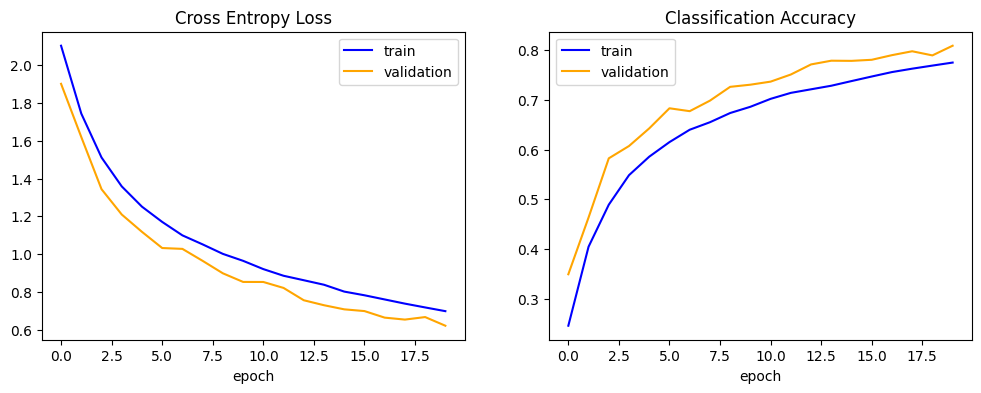

In [ ]:
plt.figure(figsize=(12, 4))
# plot loss
plt.subplot(121)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='validation')
plt.xlabel('epoch')

plt.legend()

# plot accuracy
plt.subplot(122)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='validation')
plt.xlabel('epoch')

plt.legend()
plt.show()

Les deux courbes de train et de validation ont les mêmes tendances. On a donc de bonnes performances. On observe même que les performances en validation sont meilleurs qu'en train. Le modèle est donc bien généralisable.

In [ ]:
scores = model.evaluate(test_images, test_labels)
print("Neural network accuracy: %.2f%%" % (scores[1]*100))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8013 - loss: 0.6309
Neural network accuracy: 81.80%


Les performances restent bonnes. Sur l'échantillon de test, on obtient une accuracy de presque 82%. On possède 10 classes, donc une détermination des classes au hasard devrait avoir une accuracy de 10%. On est donc bien meilleur qu'un modèle de hasard parfait.

<Axes: >

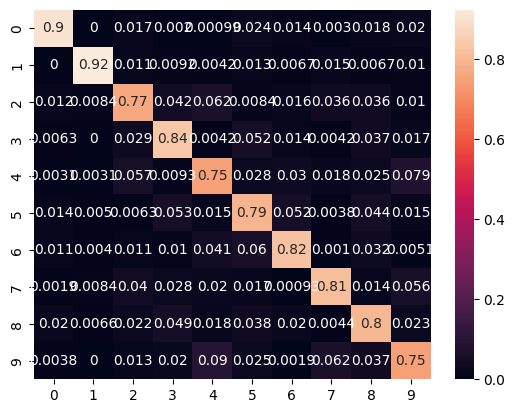

In [ ]:
prediction = model.predict(test_images)

test_pred = np.argmax(prediction,axis = 1)
test_true = np.argmax(test_labels,axis = 1)

sns.heatmap(sklearn.metrics.confusion_matrix(test_pred, test_true, normalize="true"), annot=True)

Les classes sont plus ou moins bien reconnues. La classe 1 est la meilleure, avec 92% de bien prédit, et la classe 4 ou 9 la pire avec 75%.

### Variations des paramètres

Pour améliorer les performances, on essaye d'autres paramètres.

#### Taille de batch

On réduit la taille d'un batch de 600 à 128.

In [ ]:
model_batch = construct_dense()
history = model_batch.fit(train_images, train_labels, validation_split=0.1, epochs=20, batch_size=128)

Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.2751 - loss: 2.0255 - val_accuracy: 0.5552 - val_loss: 1.3575
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.5493 - loss: 1.3448 - val_accuracy: 0.6560 - val_loss: 1.0751
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.6317 - loss: 1.1189 - val_accuracy: 0.6788 - val_loss: 0.9702
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6688 - loss: 1.0117 - val_accuracy: 0.7312 - val_loss: 0.8322
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7063 - loss: 0.9016 - val_accuracy: 0.7652 - val_loss: 0.7645
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7254 - loss: 0.8413 - val_accuracy: 0.7730 - val_loss: 0.7205
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7472 - loss: 0.7762 - val_accuracy: 0.7897 - val_loss: 0.6768
Epoch 8/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7630 - loss: 0.7384 - val_accuracy:

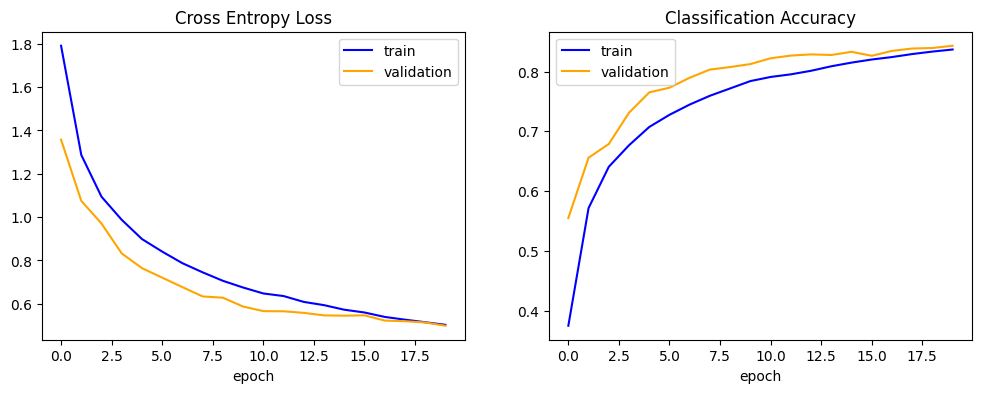

In [ ]:
plt.figure(figsize=(12, 4))
# plot loss
plt.subplot(121)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='validation')
plt.xlabel('epoch')

plt.legend()

# plot accuracy
plt.subplot(122)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='validation')
plt.xlabel('epoch')

plt.legend()
plt.show()

Les courbes ont encore la même tendance, mais cette fois elles convergent vers la même valeur.

In [ ]:
model_path = './modele_dense_batch.keras'

if os.path.isfile(model_path):
  model_batch = load_model(model_path)
else :
  model_batch.save(model_path)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8192 - loss: 0.6523
Neural network accuracy: 82.78%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


<Axes: >

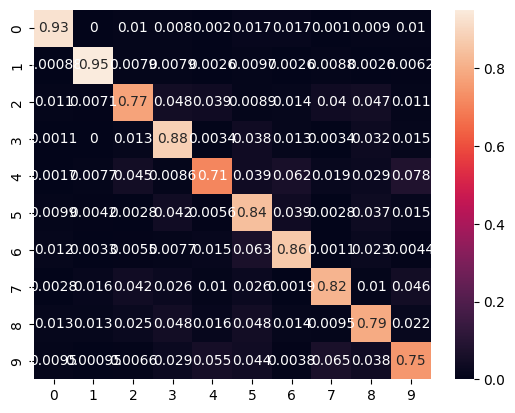

In [ ]:
scores = model_batch.evaluate(test_images, test_labels)
print("Neural network accuracy: %.2f%%" % (scores[1]*100))

prediction = model_batch.predict(test_images)

test_pred = np.argmax(prediction,axis = 1)
test_true = np.argmax(test_labels,axis = 1)

sns.heatmap(sklearn.metrics.confusion_matrix(test_pred, test_true, normalize="true"), annot=True)

On a une accuracy du réseau meilleure d'un point de pourcentage. La meilleure classe est encore meilleure, mais la pire est légéremment pire.       
On considère quand même que ce réseau est meilleur car les performances générales le sont et les courbes en train et en validation sont plus proches.

#### Nombre d'epoch

On passe de 20 répétitions (epoch) à 30, pour voir si le réseau continue à s'améliorer ou si on observe de l'overfitting.

In [ ]:
model_epoch = construct_dense()
history = model_epoch.fit(train_images, train_labels, validation_split=0.1, epochs=30, batch_size=128)

Epoch 1/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.2721 - loss: 2.0284 - val_accuracy: 0.5648 - val_loss: 1.3386
Epoch 2/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5442 - loss: 1.3488 - val_accuracy: 0.6682 - val_loss: 1.0608
Epoch 3/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6332 - loss: 1.1137 - val_accuracy: 0.7085 - val_loss: 0.9117
Epoch 4/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.6731 - loss: 0.9948 - val_accuracy: 0.7395 - val_loss: 0.8399
Epoch 5/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7031 - loss: 0.9113 - val_accuracy: 0.7748 - val_loss: 0.7471
Epoch 6/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7290 - loss: 0.8474 - val_accuracy: 0.7823 - val_loss: 0.7048
Epoch 7/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7495 - loss: 0.7771 - val_accuracy: 0.7908 - val_loss: 0.6689
Epoch 8/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.7628 - loss: 0.7386 - val_accurac

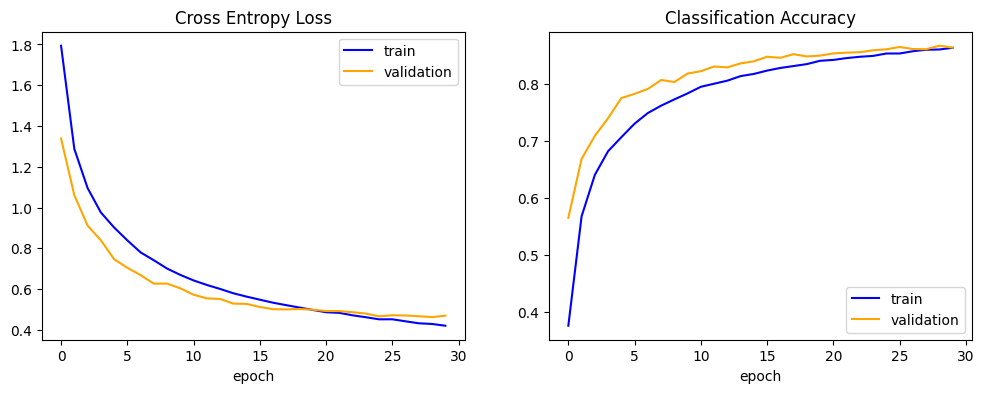

In [ ]:
plt.figure(figsize=(12, 4))
# plot loss
plt.subplot(121)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='validation')
plt.xlabel('epoch')

plt.legend()

# plot accuracy
plt.subplot(122)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='validation')
plt.xlabel('epoch')

plt.legend()
plt.show()

Le réseau continue à apprendre. On observe un peu d'overfitting sur la loss, mais peu, et l'accuracy reste bonne.

In [ ]:
model_path = './modele_dense_epoch.keras'

if os.path.isfile(model_path):
  model_epoch = load_model(model_path)
else :
  model_epoch.save(model_path)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8564 - loss: 0.4792
Neural network accuracy: 86.78%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


<Axes: >

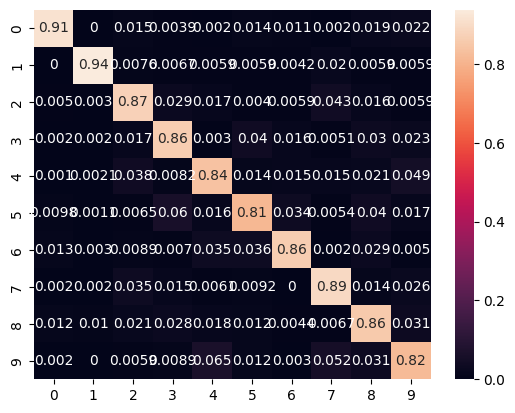

In [ ]:
scores = model_epoch.evaluate(test_images, test_labels)
print("Neural network accuracy: %.2f%%" % (scores[1]*100))

prediction = model_epoch.predict(test_images)

test_pred = np.argmax(prediction,axis = 1)
test_true = np.argmax(test_labels,axis = 1)

sns.heatmap(sklearn.metrics.confusion_matrix(test_pred, test_true, normalize="true"), annot=True)

L'accuracy générale du modèle est meilleure, avec une augmentation de 4 points de pourcentage comparé au modèle précédent. On observe aussi que la pire classe a un taux de bien prédit de 81%, encore une fois meilleur que précédemment.    
Ce modèle est donc meilleur.

#### Proportion utilisée pour la validation

On prend un plus grand échantillon de validation, qui est 30% du train au lieu de 10%.

In [ ]:
model_val = construct_dense()
history = model_val.fit(train_images, train_labels, validation_split=0.3, epochs=30, batch_size=128)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.2417 - loss: 2.0948 - val_accuracy: 0.4748 - val_loss: 1.5209
Epoch 2/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.5060 - loss: 1.4461 - val_accuracy: 0.6127 - val_loss: 1.1805
Epoch 3/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.5922 - loss: 1.2146 - val_accuracy: 0.6372 - val_loss: 1.1237
Epoch 4/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6454 - loss: 1.0721 - val_accuracy: 0.7114 - val_loss: 0.9175
Epoch 5/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6791 - loss: 0.9804 - val_accuracy: 0.7037 - val_loss: 0.9142
Epoch 6/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7077 - loss: 0.8950 - val_accuracy: 0.7326 - val_loss: 0.8497
Epoch 7/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7246 - loss: 0.8426 - val_accuracy: 0.7487 - val_loss: 0.7970
Epoch 8/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7421 - loss: 0.7858 - val_accuracy

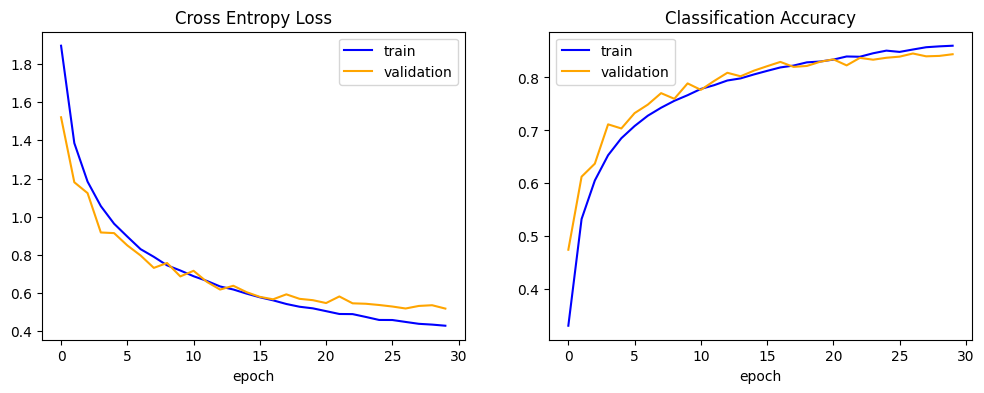

In [ ]:
plt.figure(figsize=(12, 4))
# plot loss
plt.subplot(121)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='validation')
plt.xlabel('epoch')

plt.legend()

# plot accuracy
plt.subplot(122)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='validation')
plt.xlabel('epoch')

plt.legend()
plt.show()

L'overfitting est plus marqué sur la loss comme sur l'accuracy. La courbe de validation est aussi moins lisse que précédemment.

In [ ]:
model_path = './modele_dense_val.keras'

if os.path.isfile(model_path):
  model_val = load_model(model_path)
else :
  model_val.save(model_path)

On n'observe pas d'améliorations sur les fortes variations de la courbe de validation.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8477 - loss: 0.5206
Neural network accuracy: 85.69%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


<Axes: >

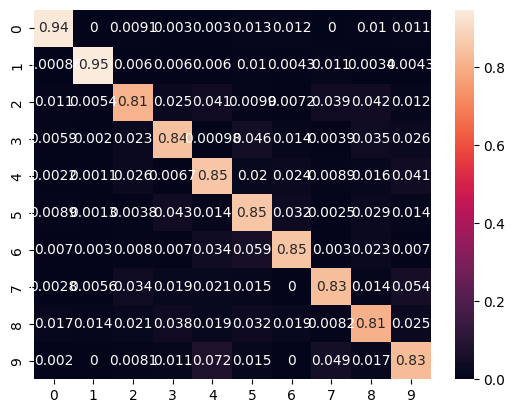

In [ ]:
scores = model_val.evaluate(test_images, test_labels)
print("Neural network accuracy: %.2f%%" % (scores[1]*100))

prediction = model_val.predict(test_images)

test_pred = np.argmax(prediction,axis = 1)
test_true = np.argmax(test_labels,axis = 1)

sns.heatmap(sklearn.metrics.confusion_matrix(test_pred, test_true, normalize="true"), annot=True)

Les résultats sont semblables à ceux obtenus précédemment, mais les courbes sont moins proches et on observe plus d'overfitting. Alors on considère que le modèle précédent était meilleur.

### Meilleur modèle

On utilise nos paramètres optimisés c'est-à-dire 30 epoch et 128 comme taille de batch. On utilise la cross-validation Kfold pour vérifier que ce sont bien nos paramètres qui sont meilleurs et pas le hasard de l'apprentissage. On choisi d'effectuer trois folds.

In [ ]:
def construct_dense():
  model = Sequential()

  model.add(Dense(256, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
  model.add(Dropout(0.3))
  model.add(Dense(128, kernel_initializer='normal', activation='relu'))

  model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

  return model

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.2445 - loss: 2.0839 - val_accuracy: 0.4917 - val_loss: 1.5325
Epoch 2/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4989 - loss: 1.4778 - val_accuracy: 0.5821 - val_loss: 1.2364
Epoch 3/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5911 - loss: 1.2359 - val_accuracy: 0.6723 - val_loss: 1.0358
Epoch 4/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6390 - loss: 1.0965 - val_accuracy: 0.6969 - val_loss: 0.9445
Epoch 5/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.6753 - loss: 0.9937 - val_accuracy: 0.7272 - val_loss: 0.8567
Epoch 6/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.6964 - loss: 0.9256 - val_accuracy: 0.7453 - val_loss: 0.8039
Epoch 7/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7183 - loss: 0.8628 - val_accuracy: 0.7548 - val_loss: 0.7691
Epoch 8/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.7362 - loss: 0.8138 - val_accu

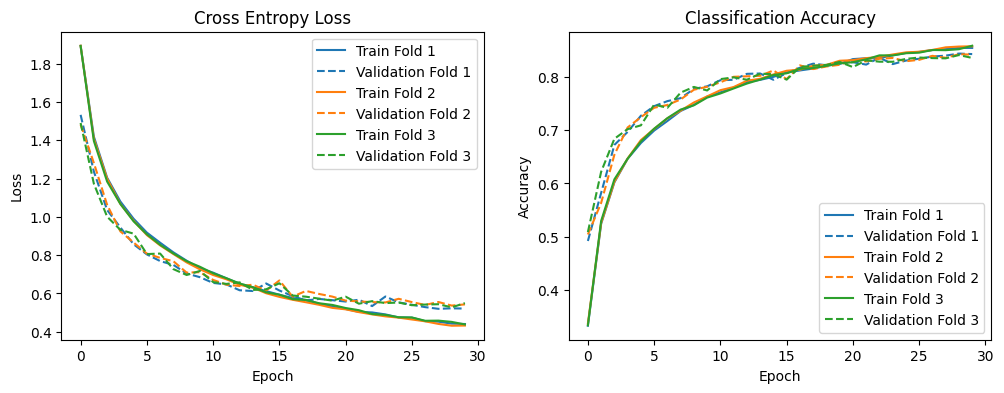

In [ ]:
best_model = None
best_accuracy = 0

kfold = KFold(n_splits=3)

accuracies = []

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

for fold, (train_index, val_index) in enumerate(kfold.split(train_images), 1):
    X_train_fold, X_val_fold = train_images[train_index], train_images[val_index]
    y_train_fold, y_val_fold = train_labels[train_index], train_labels[val_index]

    model = construct_dense()

    history = model.fit(X_train_fold, y_train_fold, validation_data=(X_val_fold, y_val_fold),
                        epochs=30, batch_size=128)

    scores = model.evaluate(X_val_fold, y_val_fold)
    accuracies.append(scores[1] * 100)

    # Sauvegarder le meilleur modèle
    if scores[1] > best_accuracy:
        best_accuracy = scores[1]
        best_model = model

    color = next(plt.gca()._get_lines.prop_cycler)['color']

    # Loss
    axes[0].plot(history.history['loss'], label=f'Train Fold {fold}', color=color)
    axes[0].plot(history.history['val_loss'], label=f'Validation Fold {fold}', linestyle='--', color=color)

    # Accuracy
    axes[1].plot(history.history['accuracy'], label=f'Train Fold {fold}', color=color)
    axes[1].plot(history.history['val_accuracy'], label=f'Validation Fold {fold}', linestyle='--', color=color)

axes[0].set_title('Cross Entropy Loss')
axes[1].set_title('Classification Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[0].legend(loc='upper right')
axes[1].legend(loc='lower right')

plt.show()

In [ ]:
print(f"Cross-validation accuracy: {np.mean(accuracies):.2f}% (±{np.std(accuracies):.2f}%)")
print(f"Best model accuracy: {best_accuracy * 100:.2f}%")

Cross-validation accuracy: 84.05% (±0.32%)
Best model accuracy: 84.32%


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8301 - loss: 0.5439
Neural network accuracy: 84.66%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


<Axes: >

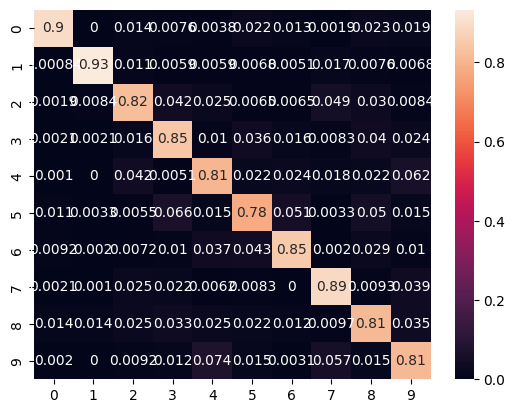

In [ ]:
scores = best_model.evaluate(test_images, test_labels)
print("Neural network accuracy: %.2f%%" % (scores[1]*100))

prediction = best_model.predict(test_images)

test_pred = np.argmax(prediction,axis = 1)
test_true = np.argmax(test_labels,axis = 1)

sns.heatmap(sklearn.metrics.confusion_matrix(test_pred, test_true, normalize="true"), annot=True)

On a 3 points de pourcentage de plus sur l'accuracy générale du réseau sur les données test (81.80% précédemment). Cependant les meilleur et pire taux de bien prédit ne sont pas très différents.

On a donc une amélioration qui est légère, mais notre réseau est quand même de qualité et prédit bien les nombres.

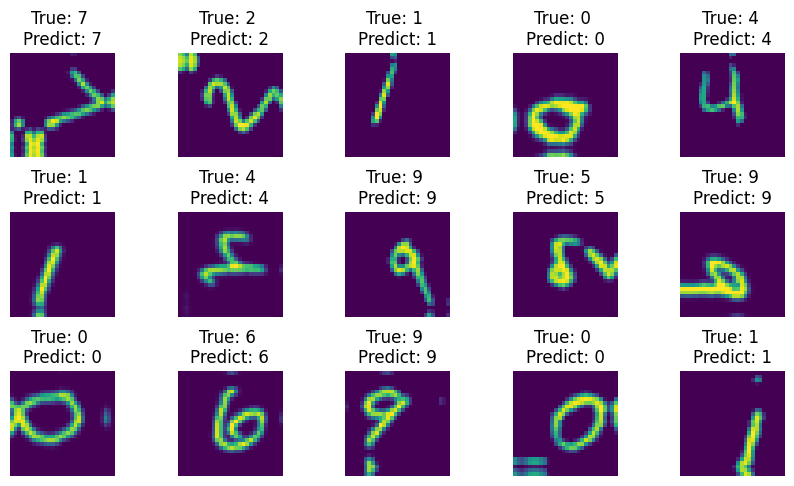

In [ ]:
square_pixels = int(math.sqrt(num_pixels))

plt.figure(figsize=[10, 10])
for i in range (15):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(test_images[i].reshape(square_pixels, square_pixels))
  plt.title("True: %s \nPredict: %s" % (test_true[i], test_pred[i]))
  plt.axis('off')
  plt.subplots_adjust(wspace=0.6)

plt.show()

## Second apprentissage : réseau avec convolution (CNN)

Les résultats sont bons, mais on a plus de 235 000 paramètres à optimiser. Pour réduire ce nombre, on va utiliser des couches de convolution.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from tensorflow.keras.models import load_model
from sklearn.model_selection import KFold

import seaborn as sns
import sklearn.metrics
import os.path

### Récupération des données

In [ ]:
train_images = np.load("../data/train_images.npy")
train_labels = np.load("../data/train_labels.npy")
test_images = np.load("../data/test_images.npy")
test_labels = np.load("../data/test_labels.npy")

In [ ]:
test_images = test_images.astype('float32')
test_images = test_images / 255

In [ ]:
num_classes = 10
train_labels = keras.utils.to_categorical(train_labels, num_classes)
test_labels = keras.utils.to_categorical(test_labels, num_classes)

In [ ]:
# Mélange des données
ns =  train_images.shape[0]
np.random.seed()
shuffle_index = np.random.permutation(ns)
train_images, train_labels = train_images[shuffle_index,:], train_labels[shuffle_index,]

### Construction du modèle

In [ ]:
def construct_cnn():
  model = Sequential()

  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
  model.add(Conv2D(32, (2, 2), activation='relu', kernel_initializer='he_uniform'))

  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())

  model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

  return model

In [ ]:
model = construct_cnn()
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 25, 25, 32)          │           8,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          46,090 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 54,954 (214.66 KB)

 Trainable params: 54,954 (214.66 KB)

 Non-trainable params: 0 (0.00 B)

Pour la première couche de convolution, on utilise 64 filtres, de 3x3 + 1 biais. On a donc 64 x 10 = 640 paramètres à optimiser. Le format sera de 26x26 puisqu'on rogne l'image en n'ajoutant pas de padding.

On ajoute une seconde couche de convolution de 32 filtres, de format 2x2 + 1 biais. La sortie de la première couche a 64 canaux. On a donc (2x2x64 + 1) x 32 = 8 224 paramètres à optimiser.

On effectue ensuite un max pooling où on conserve le maximum tous les 2x2. On divise donc l'image de moitié ce qui nous donne un format 12x12.
On met à plat ces images, de manière à obtenir 12 x 12 x 32 = 4608 valeurs.

Enfin, on a notre couche de sortie à 10 neurones prend 4 608 entrées en plus d'un biais. On aura donc 4609 x 10 = 46 090 paramètres.

Au total, on compte donc 640 + 8224 + 46090 = 54954 paramètres à optimiser.

### Apprentissage

On s'entraine avec 10% du training comme la validation.

In [ ]:
history = model.fit(train_images, train_labels, validation_split=0.1, epochs=15, batch_size=128)

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 96s 226ms/step - accuracy: 0.3651 - loss: 1.8236 - val_accuracy: 0.6180 - val_loss: 1.1786
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 135s 211ms/step - accuracy: 0.6579 - loss: 1.0587 - val_accuracy: 0.7308 - val_loss: 0.8753
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 89s 211ms/step - accuracy: 0.7480 - loss: 0.8107 - val_accuracy: 0.7727 - val_loss: 0.7302
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 144s 216ms/step - accuracy: 0.8024 - loss: 0.6422 - val_accuracy: 0.8030 - val_loss: 0.6230
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 144s 220ms/step - accuracy: 0.8393 - loss: 0.5419 - val_accuracy: 0.8273 - val_loss: 0.5651
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 88s 209ms/step - accuracy: 0.8633 - loss: 0.4562 - val_accuracy: 0.8498 - val_loss: 0.4962
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 90s 212ms/step - accuracy: 0.8798 - loss: 0.4014 - val_accuracy: 0.8487 - val_loss: 0.4976
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 140s 207ms/step - accuracy: 0.8925 - los

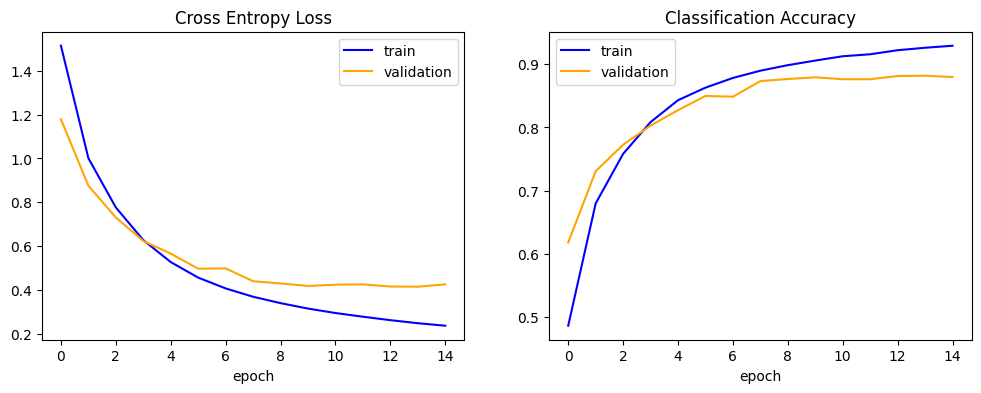

In [ ]:
plt.figure(figsize=(12, 4))
# plot lossApprentissage
plt.subplot(121)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='validation')
plt.xlabel('epoch')

plt.legend()

# plot accuracy
plt.subplot(122)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='validation')
plt.xlabel('epoch')

plt.legend()
plt.show()

La courbe de validation augmente avec le temps pour la loss, et diminue pour l'accuracy. On a donc de l'overfitting.

In [ ]:
scores = model.evaluate(test_images, test_labels)
print("Neural network accuracy: %.2f%%" % (scores[1]*100))

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.7794 - loss: 0.7726
Neural network accuracy: 78.93%


In [ ]:
prediction = model.predict(test_images)

test_pred = np.argmax(prediction,axis = 1)
test_true = np.argmax(test_labels,axis = 1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step


<Axes: >

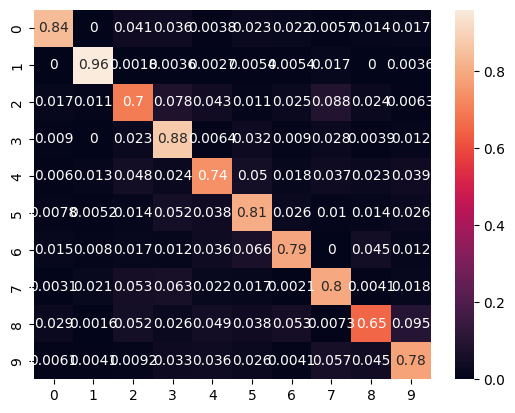

In [ ]:
sns.heatmap(sklearn.metrics.confusion_matrix(test_pred, test_true, normalize="true"), annot=True)

Les performances sont moins bonnes qu'avec le réseau dense. Il faut donc optimiser notre réseau de convolution.

### Optimisation

En plus des paramètres, on va aussi optimiser l'architecture du modèle.

#### MaxPooling après chaque couche de convolution

In [ ]:
def construct_cnn():
  model = Sequential()

  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
  model.add(MaxPooling2D((2, 2)))

  model.add(Conv2D(32, (2, 2), activation='relu', kernel_initializer='he_uniform'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())

  model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

  return model

In [ ]:
model = construct_cnn()
model.summary()

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)                   │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 12, 12, 32)          │           8,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 10)                  │          11,530 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,394 (79.66 KB)

 Trainable params: 20,394 (79.66 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(train_images, train_labels, validation_split=0.1, epochs=15, batch_size=128)

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 48s 112ms/step - accuracy: 0.3463 - loss: 1.8641 - val_accuracy: 0.6162 - val_loss: 1.1551
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 91s 133ms/step - accuracy: 0.6450 - loss: 1.0906 - val_accuracy: 0.6907 - val_loss: 0.9550
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 73s 112ms/step - accuracy: 0.7224 - loss: 0.8737 - val_accuracy: 0.7318 - val_loss: 0.8328
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 48s 114ms/step - accuracy: 0.7755 - loss: 0.7200 - val_accuracy: 0.7873 - val_loss: 0.6923
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 82s 114ms/step - accuracy: 0.8115 - loss: 0.6179 - val_accuracy: 0.8195 - val_loss: 0.5831
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 80s 110ms/step - accuracy: 0.8311 - loss: 0.5547 - val_accuracy: 0.8150 - val_loss: 0.5904
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 46s 110ms/step - accuracy: 0.8483 - loss: 0.4957 - val_accuracy: 0.8518 - val_loss: 0.5157
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 83s 113ms/step - accuracy: 0.8631 - loss: 0

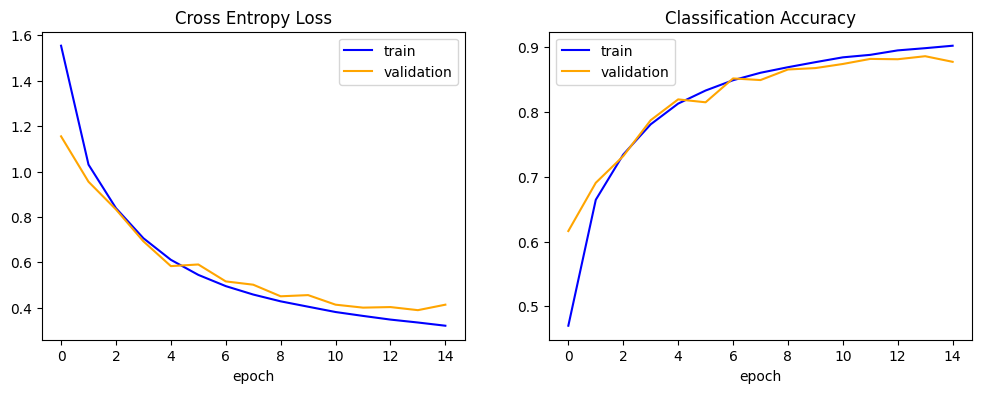

In [ ]:
plt.figure(figsize=(12, 4))
# plot loss
plt.subplot(121)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='validation')
plt.xlabel('epoch')

plt.legend()

# plot accuracy
plt.subplot(122)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='validation')
plt.xlabel('epoch')

plt.legend()
plt.show()

L'overfitting est moins important, mais toujours présent.

In [ ]:
scores = model.evaluate(test_images, test_labels)
print("Neural network accuracy: %.2f%%" % (scores[1]*100))

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.8772 - loss: 0.4101
Neural network accuracy: 88.78%


In [ ]:
prediction = model.predict(test_images)

test_pred = np.argmax(prediction,axis = 1)
test_true = np.argmax(test_labels,axis = 1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


<Axes: >

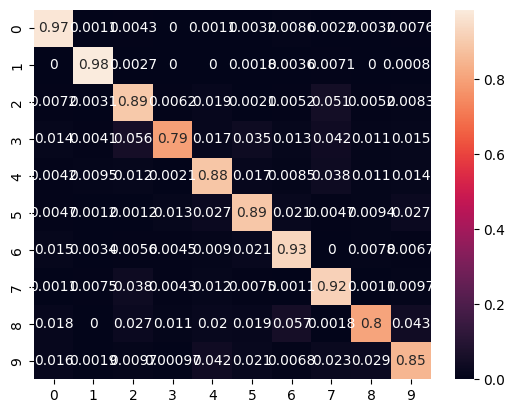

In [ ]:
sns.heatmap(sklearn.metrics.confusion_matrix(test_pred, test_true, normalize="true"), annot=True)

Les performances sont néanmoins meilleures, on a une amélioration de 10 points de pourcentage de l'accuracy générale du réseau sur les données test.

#### Ajout d'une couche dense

In [ ]:
def construct_cnn():
  model = Sequential()

  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
  model.add(MaxPooling2D((2, 2)))

  model.add(Conv2D(32, (2, 2), activation='relu', kernel_initializer='he_uniform'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())

  model.add(Dense(64, kernel_initializer='normal', activation='relu'))

  model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

  return model

In [ ]:
model = construct_cnn()
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 12, 12, 32)          │           8,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 83,306 (325.41 KB)

 Trainable params: 83,306 (325.41 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(train_images, train_labels, validation_split=0.1, epochs=15, batch_size=128)

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 53s 123ms/step - accuracy: 0.3746 - loss: 1.7872 - val_accuracy: 0.7213 - val_loss: 0.8767
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 97s 158ms/step - accuracy: 0.7661 - loss: 0.7445 - val_accuracy: 0.8295 - val_loss: 0.5551
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 81s 156ms/step - accuracy: 0.8504 - loss: 0.4859 - val_accuracy: 0.8743 - val_loss: 0.4030
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 68s 123ms/step - accuracy: 0.8861 - loss: 0.3669 - val_accuracy: 0.8642 - val_loss: 0.4240
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 83s 125ms/step - accuracy: 0.9096 - loss: 0.2916 - val_accuracy: 0.8975 - val_loss: 0.3396
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 51s 122ms/step - accuracy: 0.9228 - loss: 0.2482 - val_accuracy: 0.9018 - val_loss: 0.3161
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 82s 121ms/step - accuracy: 0.9360 - loss: 0.2106 - val_accuracy: 0.9158 - val_loss: 0.2741
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 84s 126ms/step - accuracy: 0.9451 - loss: 0

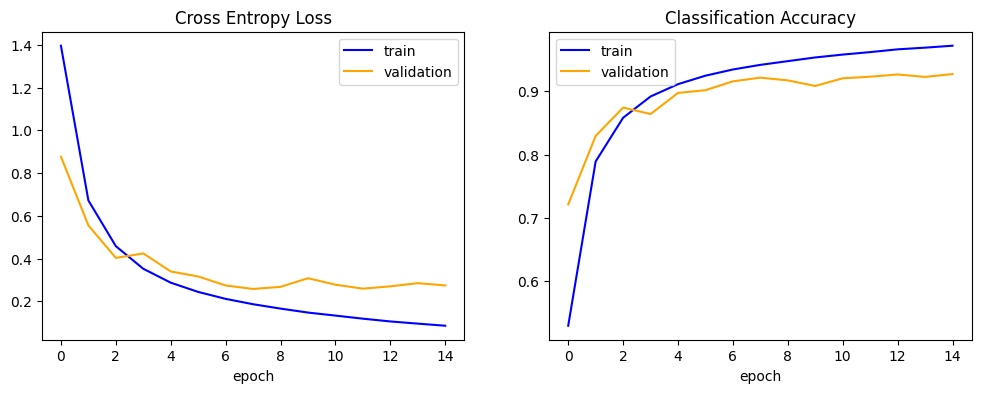

In [ ]:
plt.figure(figsize=(12, 4))
# plot loss
plt.subplot(121)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='validation')
plt.xlabel('epoch')

plt.legend()

# plot accuracy
plt.subplot(122)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='validation')
plt.xlabel('epoch')

plt.legend()
plt.show()

L'overfitting est plus important cette fois.

In [ ]:
scores = model.evaluate(test_images, test_labels)
print("Neural network accuracy: %.2f%%" % (scores[1]*100))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9182 - loss: 0.3065
Neural network accuracy: 92.76%


In [ ]:
prediction = model.predict(test_images)

test_pred = np.argmax(prediction,axis = 1)
test_true = np.argmax(test_labels,axis = 1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


<Axes: >

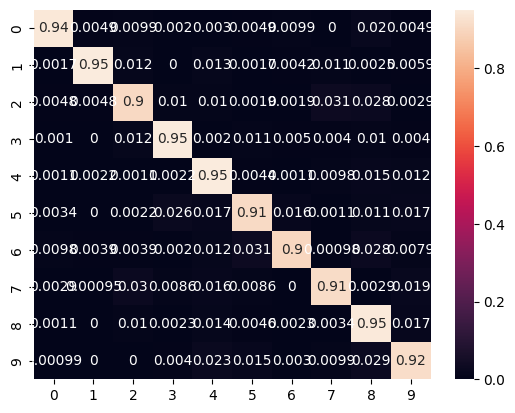

In [ ]:
sns.heatmap(sklearn.metrics.confusion_matrix(test_pred, test_true, normalize="true"), annot=True)

Les performances sont encore meilleures, mais l'overfitting est trop important.

#### Dropout

In [ ]:
def construct_cnn():
  model = Sequential()

  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
  model.add(MaxPooling2D((2, 2)))

  model.add(Conv2D(32, (2, 2), activation='relu', kernel_initializer='he_uniform'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())

  model.add(Dense(64, kernel_initializer='normal', activation='relu'))
  model.add(Dropout(0.15))

  model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

  return model

In [ ]:
model = construct_cnn()
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 12, 12, 32)          │           8,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (None, 64)                  │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_48 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 83,306 (325.41 KB)

 Trainable params: 83,306 (325.41 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(train_images, train_labels, validation_split=0.1, epochs=15, batch_size=128)

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 53s 122ms/step - accuracy: 0.3342 - loss: 1.8595 - val_accuracy: 0.7155 - val_loss: 0.9184
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 84s 128ms/step - accuracy: 0.7098 - loss: 0.8831 - val_accuracy: 0.8298 - val_loss: 0.5765
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 53s 125ms/step - accuracy: 0.7930 - loss: 0.6389 - val_accuracy: 0.8715 - val_loss: 0.4335
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 82s 125ms/step - accuracy: 0.8331 - loss: 0.5244 - val_accuracy: 0.8805 - val_loss: 0.3968
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 82s 125ms/step - accuracy: 0.8545 - loss: 0.4522 - val_accuracy: 0.8923 - val_loss: 0.3508
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 83s 127ms/step - accuracy: 0.8701 - loss: 0.4024 - val_accuracy: 0.8947 - val_loss: 0.3446
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 52s 122ms/step - accuracy: 0.8842 - loss: 0.3587 - val_accuracy: 0.9123 - val_loss: 0.3020
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 83s 125ms/step - accuracy: 0.8933 - loss: 0

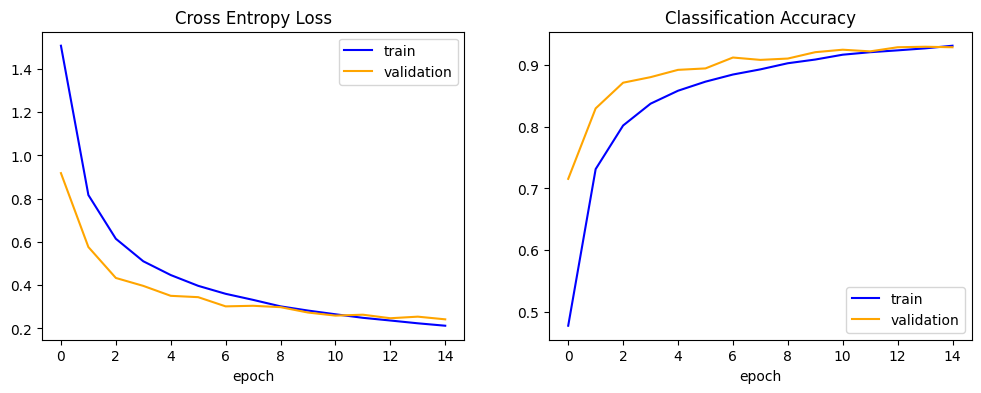

In [ ]:
plt.figure(figsize=(12, 4))
# plot loss
plt.subplot(121)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='validation')
plt.xlabel('epoch')

plt.legend()

# plot accuracy
plt.subplot(122)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='validation')
plt.xlabel('epoch')

plt.legend()
plt.show()

On n'observe quasiment plus d'overfitting, les courbes train et validation sont très proches.

In [ ]:
scores = model.evaluate(test_images, test_labels)
print("Neural network accuracy: %.2f%%" % (scores[1]*100))

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9282 - loss: 0.2467
Neural network accuracy: 93.47%


In [ ]:
prediction = model.predict(test_images)

test_pred = np.argmax(prediction,axis = 1)
test_true = np.argmax(test_labels,axis = 1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


<Axes: >

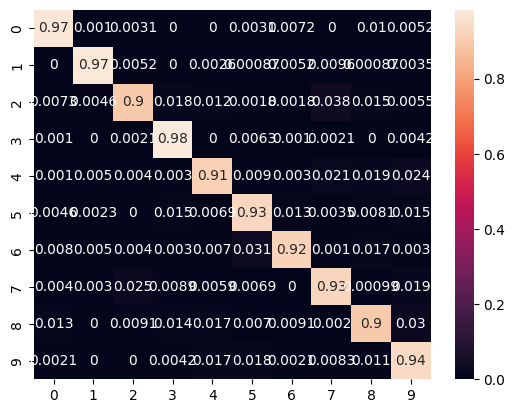

In [ ]:
sns.heatmap(sklearn.metrics.confusion_matrix(test_pred, test_true, normalize="true"), annot=True)

Les performances par classe sont très acceptables, avec toutes ayant un taux de bien prédit supérieur à 90%.

### Meilleur modèle

In [ ]:
def construct_cnn():
  model = Sequential()

  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
  model.add(MaxPooling2D((2, 2)))

  model.add(Conv2D(32, (2, 2), activation='relu', kernel_initializer='he_uniform'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())

  model.add(Dense(64, kernel_initializer='normal', activation='relu'))
  model.add(Dropout(0.15))

  model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

  return model

Epoch 1/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 60s 189ms/step - accuracy: 0.3196 - loss: 1.8972 - val_accuracy: 0.6945 - val_loss: 0.9868
Epoch 2/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 72s 158ms/step - accuracy: 0.6919 - loss: 0.9416 - val_accuracy: 0.7875 - val_loss: 0.6881
Epoch 3/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 94s 197ms/step - accuracy: 0.7802 - loss: 0.6809 - val_accuracy: 0.8318 - val_loss: 0.5494
Epoch 4/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 50s 161ms/step - accuracy: 0.8167 - loss: 0.5705 - val_accuracy: 0.8641 - val_loss: 0.4463
Epoch 5/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 79s 151ms/step - accuracy: 0.8458 - loss: 0.4793 - val_accuracy: 0.8794 - val_loss: 0.4003
Epoch 6/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 83s 155ms/step - accuracy: 0.8656 - loss: 0.4250 - val_accuracy: 0.8888 - val_loss: 0.3670
Epoch 7/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 79s 144ms/step - accuracy: 0.8764 - loss: 0.3866 - val_accuracy: 0.8846 - val_loss: 0.3735
Epoch 8/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 93s 180ms/step - accuracy: 0.8858 - loss: 0

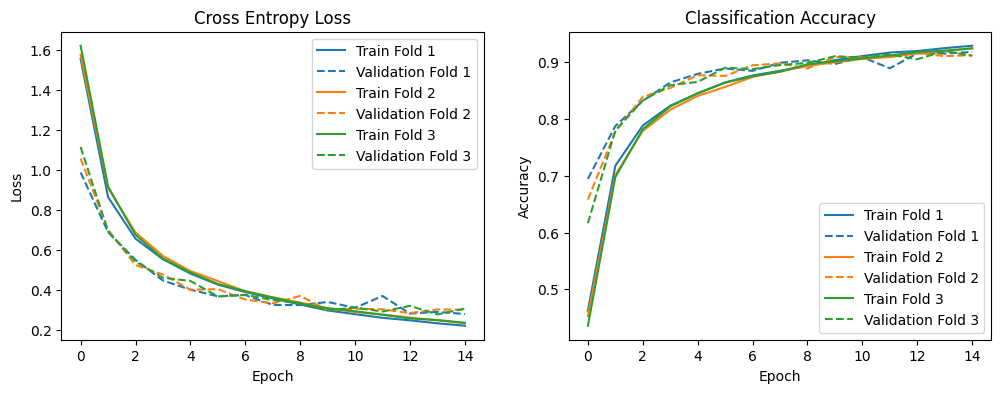

In [ ]:
best_model = None
best_accuracy = 0

kfold = KFold(n_splits=3)

accuracies = []

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

for fold, (train_index, val_index) in enumerate(kfold.split(train_images), 1):
    X_train_fold, X_val_fold = train_images[train_index], train_images[val_index]
    y_train_fold, y_val_fold = train_labels[train_index], train_labels[val_index]

    model = construct_cnn()

    history = model.fit(X_train_fold, y_train_fold, validation_data=(X_val_fold, y_val_fold),
                        epochs=15, batch_size=128)

    scores = model.evaluate(X_val_fold, y_val_fold)
    accuracies.append(scores[1] * 100)

    # Sauvegarder le meilleur modèle
    if scores[1] > best_accuracy:
        best_accuracy = scores[1]
        best_model = model

    color = next(plt.gca()._get_lines.prop_cycler)['color']

    # Loss
    axes[0].plot(history.history['loss'], label=f'Train Fold {fold}', color=color)
    axes[0].plot(history.history['val_loss'], label=f'Validation Fold {fold}', linestyle='--', color=color)

    # Accuracy
    axes[1].plot(history.history['accuracy'], label=f'Train Fold {fold}', color=color)
    axes[1].plot(history.history['val_accuracy'], label=f'Validation Fold {fold}', linestyle='--', color=color)

axes[0].set_title('Cross Entropy Loss')
axes[1].set_title('Classification Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[0].legend(loc='upper right')
axes[1].legend(loc='lower right')

plt.show()

In [ ]:
print(f"Cross-validation accuracy: {np.mean(accuracies):.2f}% (±{np.std(accuracies):.2f}%)")
print(f"Best model accuracy: {best_accuracy * 100:.2f}%")

Cross-validation accuracy: 91.38% (±0.30%)
Best model accuracy: 91.79%


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9129 - loss: 0.2840
Neural network accuracy: 92.20%
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


<Axes: >

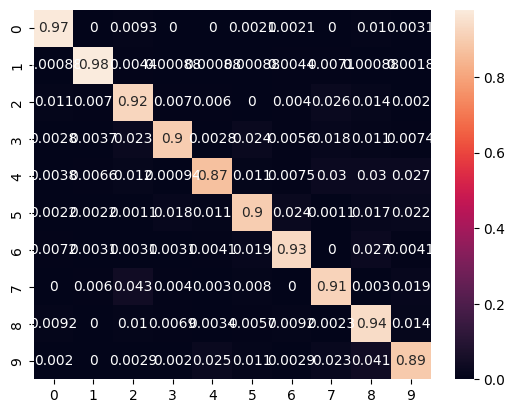

In [ ]:
scores = best_model.evaluate(test_images, test_labels)
print("Neural network accuracy: %.2f%%" % (scores[1]*100)),

prediction = best_model.predict(test_images)

test_pred = np.argmax(prediction,axis = 1)
test_true = np.argmax(test_labels,axis = 1)

sns.heatmap(sklearn.metrics.confusion_matrix(test_pred, test_true, normalize="true"), annot=True)

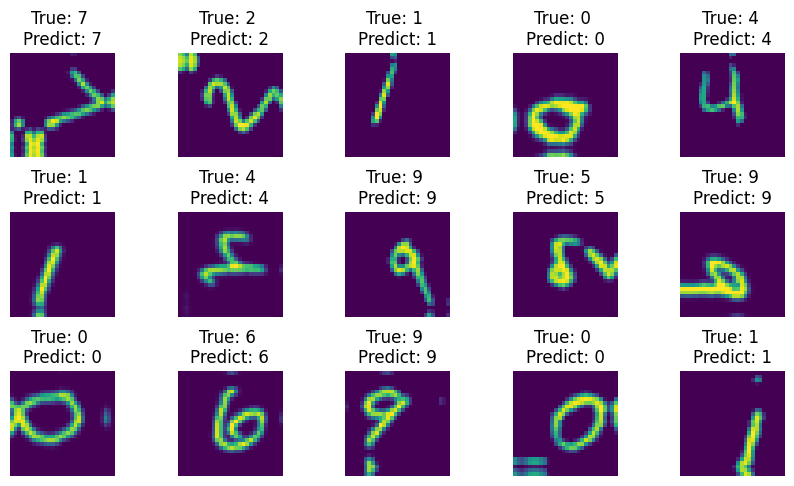

In [ ]:
plt.figure(figsize=[10, 10])
for i in range (15):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(test_images[i])
  plt.title("True: %s \nPredict: %s" % (test_true[i], test_pred[i]))
  plt.axis('off')
  plt.subplots_adjust(wspace=0.6)

plt.show()

## Comparaison des réseaux

On a construit deux réseaux de neurones pour classifier nos images de chiffre, un réseau dense et un de convolution dont les résultats principaux sont les suivants:

| Type        | Accuracy | Paramètres | Pire classe | Meilleure classe | Temps d'un batch (128) |
|-------------|----------|------------|-------------|------------------|------------------------|
| Dense       | 84,66%    | 235 146    | 0,78        | 0,93             | ~5s                    |
| Convolution | 92,20%    | 83 306     | 0,87        | 0,98             | ~70s                   |

Les performances obtenues avec le réseau de convolution sont les meilleures. L'accuracy générale comme les prédictions de chaque classe sont améliorées. On observe aussi qu'on a réduit de deux tiers le nombre de paramètres. Néanmoins, le temps d'execution d'un batch multiplié par 14 avec ce réseau, ce qui est non négligeable.

On a donc un réseau meilleur, mais plus lent. Cela n'est cependant pas assez pour choisir le réseau dense plutôt que celui de convolution.